In [1]:
import pandas as pd
import glob

# Get list of all CSV files in the data folder
csv_files = glob.glob("../data/yellow_tripdata_*.csv")

# Load and combine them
df_list = []
for file in csv_files:
    print(f"Reading {file} ...")
    df_list.append(pd.read_csv(file, nrows=100000))  # load 100k rows from each for speed

df = pd.concat(df_list, ignore_index=True)
print("Combined shape:", df.shape)
df.head()


Reading ../data\yellow_tripdata_2015-01.csv ...
Reading ../data\yellow_tripdata_2016-01.csv ...
Reading ../data\yellow_tripdata_2016-02.csv ...
Reading ../data\yellow_tripdata_2016-03.csv ...
Combined shape: (400000, 20)


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,RatecodeID
0,2,2015-01-15 19:05:39,2015-01-15 19:23:42,1,1.59,-73.993896,40.750111,1.0,N,-73.974785,40.750618,1,12.0,1.0,0.5,3.25,0.0,0.3,17.05,NaN
1,1,2015-01-10 20:33:38,2015-01-10 20:53:28,1,3.30,-74.001648,40.724243,1.0,N,-73.994415,40.759109,1,14.5,0.5,0.5,2.00,0.0,0.3,17.80,NaN
2,1,2015-01-10 20:33:38,2015-01-10 20:43:41,1,1.80,-73.963341,40.802788,1.0,N,-73.951820,40.824413,2,9.5,0.5,0.5,0.00,0.0,0.3,10.80,NaN
3,1,2015-01-10 20:33:39,2015-01-10 20:35:31,1,0.50,-74.009087,40.713818,1.0,N,-74.004326,40.719986,2,3.5,0.5,0.5,0.00,0.0,0.3,4.80,NaN
4,1,2015-01-10 20:33:39,2015-01-10 20:52:58,1,3.00,-73.971176,40.762428,1.0,N,-74.004181,40.742653,2,15.0,0.5,0.5,0.00,0.0,0.3,16.30,NaN


In [3]:
import pandas as pd
df = pd.read_csv("../data/yellow_tripdata_2015-01.csv", nrows=5)
print(df.columns)


Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'pickup_longitude',
       'pickup_latitude', 'RateCodeID', 'store_and_fwd_flag',
       'dropoff_longitude', 'dropoff_latitude', 'payment_type', 'fare_amount',
       'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount'],
      dtype='object')


In [2]:
from shapely.geometry import Point
import geopandas as gpd
import pandas as pd

df = pd.read_csv("../data/yellow_tripdata_2015-01.csv", nrows=10000)

# Keep only rows where coordinates are valid (not zero)
df = df[
    (df.pickup_longitude != 0) &
    (df.pickup_latitude != 0) &
    (df.pickup_longitude > -80) & (df.pickup_longitude < -70) &
    (df.pickup_latitude > 35) & (df.pickup_latitude < 45)
]

gdf = gpd.GeoDataFrame(
    df,
    geometry=[Point(xy) for xy in zip(df.pickup_longitude, df.pickup_latitude)],
    crs="EPSG:4326"
)

gdf = gdf.to_crs(epsg=3857)
gdf.head()


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,geometry
0,2,2015-01-15 19:05:39,2015-01-15 19:23:42,1,1.59,-73.993896,40.750111,1,N,-73.974785,40.750618,1,12.0,1.0,0.5,3.25,0.0,0.3,17.05,POINT (-8236962.878 4975552.617)
1,1,2015-01-10 20:33:38,2015-01-10 20:53:28,1,3.30,-74.001648,40.724243,1,N,-73.994415,40.759109,1,14.5,0.5,0.5,2.00,0.0,0.3,17.80,POINT (-8237825.768 4971752.286)
2,1,2015-01-10 20:33:38,2015-01-10 20:43:41,1,1.80,-73.963341,40.802788,1,N,-73.951820,40.824413,2,9.5,0.5,0.5,0.00,0.0,0.3,10.80,POINT (-8233561.431 4983296.281)
3,1,2015-01-10 20:33:39,2015-01-10 20:35:31,1,0.50,-74.009087,40.713818,1,N,-74.004326,40.719986,2,3.5,0.5,0.5,0.00,0.0,0.3,4.80,POINT (-8238653.835 4970221.026)
4,1,2015-01-10 20:33:39,2015-01-10 20:52:58,1,3.00,-73.971176,40.762428,1,N,-74.004181,40.742653,2,15.0,0.5,0.5,0.00,0.0,0.3,16.30,POINT (-8234433.662 4977362.791)


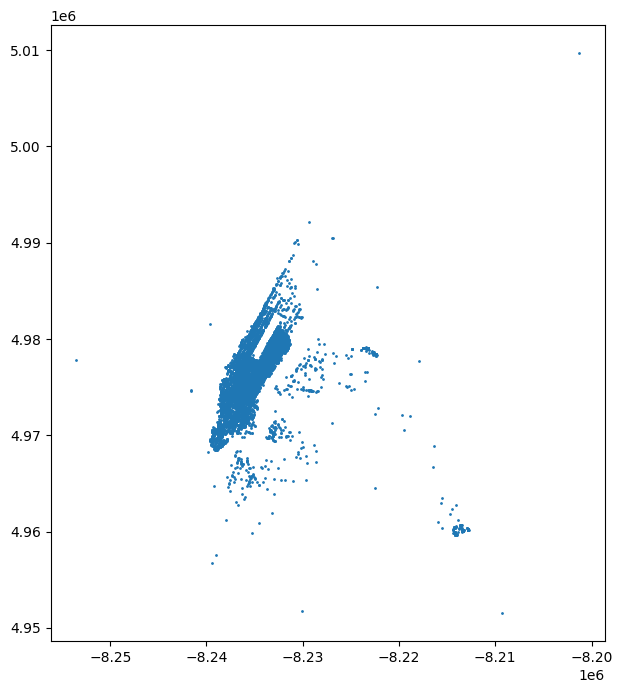

In [3]:
import matplotlib.pyplot as plt

gdf.plot(figsize=(8,8), markersize=1)
plt.show()


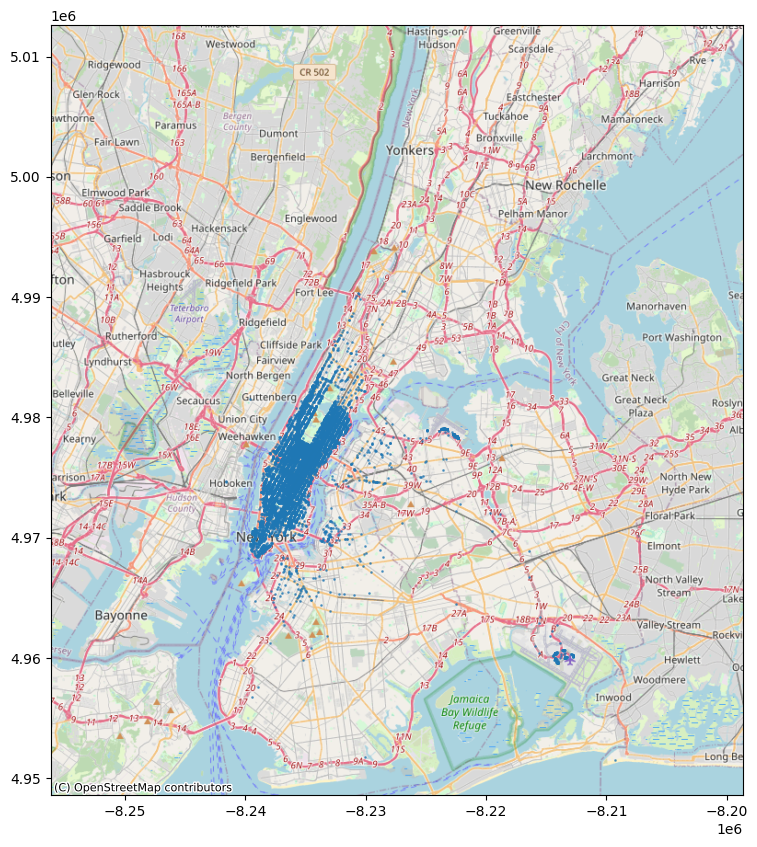

In [4]:
import contextily as ctx
import matplotlib.pyplot as plt

ax = gdf.plot(figsize=(10, 10), markersize=1, alpha=0.6)
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)
plt.show()

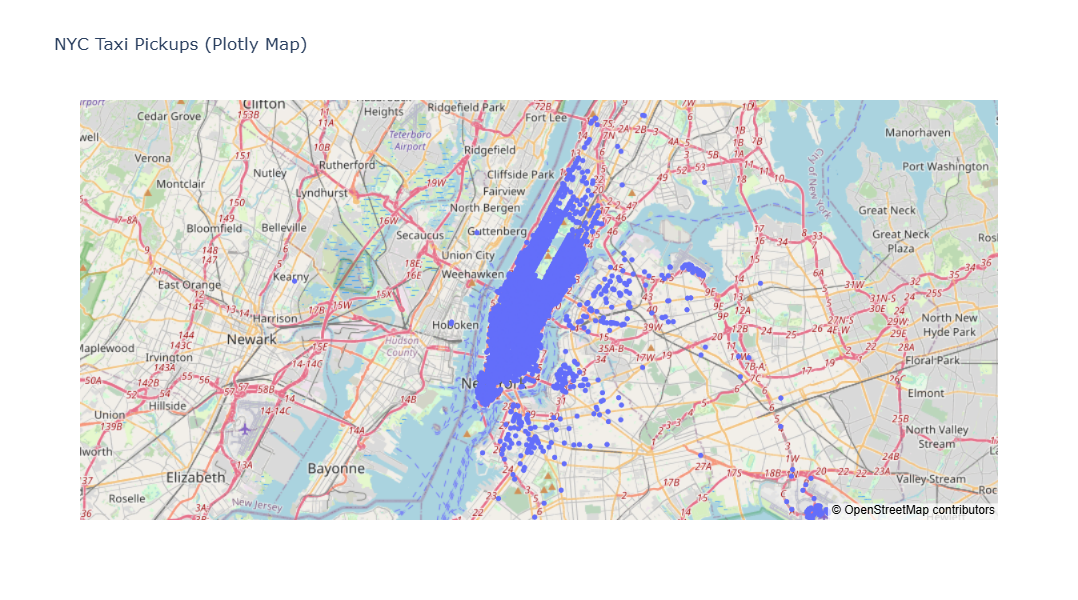

In [6]:
import plotly.express as px

# Convert GeoDataFrame to GeoJSON format
gdf_4326 = gdf.to_crs(epsg=4326)

fig = px.scatter_map(
    gdf_4326,
    lat=gdf_4326.geometry.y,
    lon=gdf_4326.geometry.x,
    hover_data=['pickup_longitude', 'pickup_latitude'],
    title="NYC Taxi Pickups (Plotly Map)",
    zoom=10,
    height=600
)

fig.update_layout(map_style="open-street-map")
fig.show()
